# Table of contents
>[Introduction](#scrollTo=q7X8Hd5hB0Bb)

>>[Context of dataset](#scrollTo=q7X8Hd5hB0Bb)

>>[Objectives of kernel](#scrollTo=q7X8Hd5hB0Bb)

>>[Import Libraries](#scrollTo=Gzs9_Ze2B0Bq)

>>>[Understanding the data](#scrollTo=vR-j07a_B0Bv)

>>[Datapeek- head and describe !](#scrollTo=JuawoyWAB0Bx)

>[Pivot Table analysis-Pandas](#scrollTo=AiYfOutdB0B0)

>>[Demographic analysis 1](#scrollTo=k1z1wpVCB0B1)

>>[Demographic analysis 2](#scrollTo=zwExa5eoB0B1)

>>[Time factor analysis 1](#scrollTo=TNeoJVzYB0B4)

>[Exploratory Data Analysis](#scrollTo=RfjN0rVQB0B6)

>>[Univariate Analysis](#scrollTo=RfjN0rVQB0B6)

>>[Demographic Analysis](#scrollTo=-gPbjnEXB0B6)

>>[Consumer preferences](#scrollTo=GQMzY-M_B0B7)

>>[Purchase Demand](#scrollTo=5TjMawXbB0B8)

>>[Restriction in order demand](#scrollTo=i_8afN9cB0C3)

>>[Influence in Cancellation of order](#scrollTo=Mlz1USuUB0EG)

>>[Time factors in order demand](#scrollTo=gVRpxVCrB0EI)

>>[Importance of rating post delivery](#scrollTo=Jxmpywg7B0EL)

>>[Bivariate Analysis](#scrollTo=cfgHNfB3B0Eb)

>>[Bivariate Analysis-1](#scrollTo=cfgHNfB3B0Eb)

>>[Bivariate Analysis-2](#scrollTo=UL7c6dUuB0Eg)

>>[Bivariate Analysis-3](#scrollTo=k4v6c1u-B0Em)

>>[Bivariate Analysis-4](#scrollTo=PCQIclVaB0Es)

>>[Multivariate Analysis](#scrollTo=wi63U4aYB0Eu)

>>[Multivariate Analysis-1](#scrollTo=wi63U4aYB0Eu)

>>[Multivariate Analysis-2](#scrollTo=ts_P6onUB0Ev)

>>[Multivariate Analysis -3](#scrollTo=B6P3r9usB0Ex)

>>[Multivariate Analysis-4](#scrollTo=L79rAYCtB0E0)

>>[Multivariate Analysis-5](#scrollTo=QWGsPerSB0E2)

>[Geospatial Analysis](#scrollTo=AI3ogA7eB0E4)

>>[Geo Pointers](#scrollTo=AI3ogA7eB0E4)

>>[Clustered Location](#scrollTo=7p_7g7oTB0E6)

>[Conclusion](#scrollTo=irZABhNfB0Fa)



# Introduction
<img src="https://cdn.dribbble.com/users/1890021/screenshots/8576649/media/fffdfabcea9ffe954570a25aa9423b08.gif">

Food delivery has become a popular service in the restaurant sector. People prefer ordering food online since they seldom have time to go grocery shopping and make food. Start-ups such as Swiggy, Zomato, Dunzo, and others provide a wide range of options for delivering meals to their door. These start-ups become a medium for food delivery, and restaurants become a venue for consumers to cook meals. Food delivery is especially popular in metropolitan areas, where delivery captains are more common. When these captains accept an order request from a buyer, the order procedure begins and ends with the meal being delivered provided to the consumer. Customers offer ratings once the order is done, and ratings influence various satisfaction criteria. Customers submit ratings for the delivery service and the food quality after they have eaten the meal. Customers will order from the same restaurant again if the meal quality is acceptable and from the same service provider if the delivery service is satisfactory, resulting in a demand for that restaurant's cuisine and delivery service.
## Context of dataset
This dataset was collected from the **residents of Bangalore** which studies on factors which are contributing to the demand of food delivery in the city.


## Objectives of kernel
1. Pivot table analysis-Pandas
2. Exploratory data analysis- Univariate, Bivariate and Multivariate
3. Geospatial Analysis
4. Text Analysis


## Import Libraries
Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [6]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

#Geospatial Analysis Libraries
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob


#Miscellaneous libraries
from collections import defaultdict
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### Understanding the data
The code reads a dataset from a CSV file and prints the shape of the dataset (number of rows and columns) as well as the information about the dataset, including the column names, data types, and non-null counts for each column.






In [7]:
#Reading the data
delivery=pd.read_csv('data.csv')

#Printing the information of dataset
print ("The shape of the  data is (row, column):"+ str(delivery.shape))
print(delivery.info())

The shape of the  data is (row, column):(388, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 n

## Datapeek- head and describe !


In [8]:
delivery.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [9]:
delivery.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# Pivot Table analysis-Pandas


## Demographic analysis 1

The code creates a pivot table from the "delivery" dataset, grouping it by "Gender" and "Marital Status" and calculating the mean and count of "Age" and "Family size". It then applies a color gradient to the pivot table using a light green palette.






In [10]:
#Pivot table
delivery_pivot1=pd.pivot_table(delivery,index=["Gender","Marital Status"],
                               values=['Age','Family size'],
                               aggfunc=[np.mean,len], margins=True)

#Adding color gradient
cm = sns.light_palette("green", as_cmap=True)
delivery_pivot1.style.background_gradient(cmap=cm)

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1082794310.py:2: FutureWarning:

The provided callable <function mean at 0x000002929D898E50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



## Demographic analysis 2

The code creates a pivot table from the "delivery" dataset, grouping it by "Educational Qualifications" and "Occupation" and calculating the mean, count, and standard deviation of "Age" and "Family size". It then adds bars to the pivot table to visually represent the numbers.






In [11]:
#Pivot table
delivery_pivot2=pd.pivot_table(delivery,index=["Educational Qualifications","Occupation"],
                               values=['Age','Family size'],
                               aggfunc=[np.mean,len,np.std])

#Adding bar for numbers
delivery_pivot2.style.bar()

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\336244705.py:2: FutureWarning:

The provided callable <function mean at 0x000002929D898E50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\336244705.py:2: FutureWarning:

The provided callable <function std at 0x000002929D898F70> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.



## Time factor analysis 1

The code creates a pivot table from the "delivery" dataset, grouping it by "Order Time" and "Maximum wait time" and counting the occurrences of "Influence of time" values. It then adds a color gradient to the pivot table using a blue palette.






In [12]:
#Pivot table
delivery_pivot4=pd.pivot_table(delivery,index=["Order Time","Maximum wait time"],
                               values=['Age','Family size'],columns=['Influence of time'],
                               aggfunc={'Influence of time':len},
                               fill_value=0)

#Adding color gradient
cm = sns.light_palette("blue", as_cmap=True)
delivery_pivot4.style.background_gradient(cmap=cm)

# Exploratory Data Analysis

## Univariate Analysis
The code sets up a frame with four subplots and creates the following visualizations:

* A distribution plot (displot) of the "Age" variable.
* A distribution plot (displot) of the "Family size" variable.
* A boxplot of the "Age" variable.
* A boxplot of the "Family size" variable.

The visualizations are displayed in a figure with proper titles, axes labels, and formatting.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\323230494.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\323230494.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




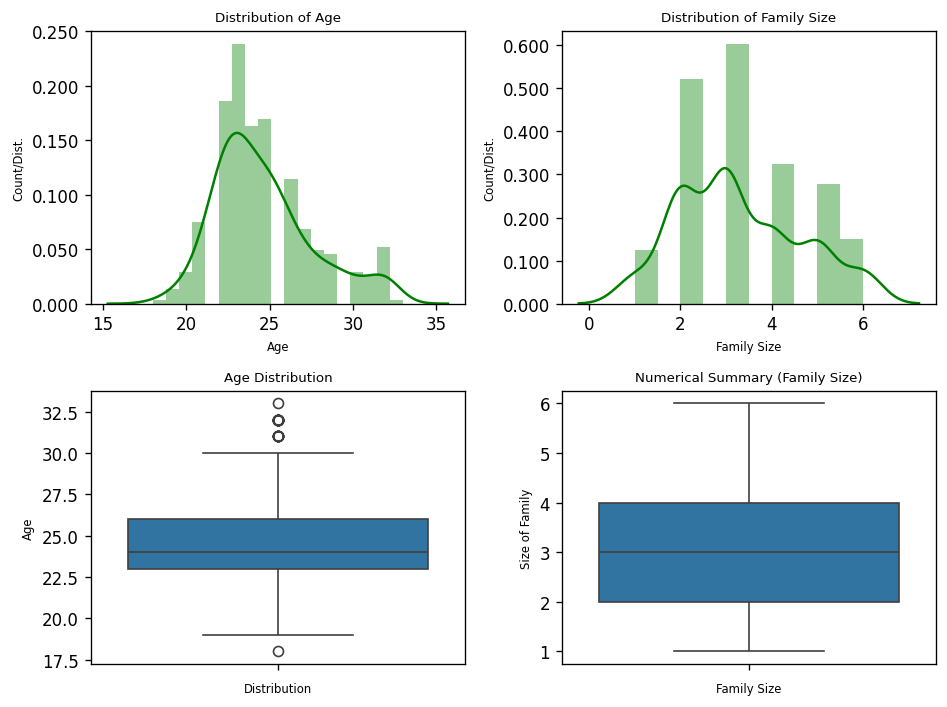

In [13]:
#Setting up the frame
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

#Distribution of age with displot
plot00=sns.distplot(delivery['Age'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Age',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

#Distribution of Familysize with displot
plot01=sns.distplot(delivery['Family size'],ax=axes[0][1],color='green')
axes[0][1].set_title('Distribution of Family Size',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Family Size',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.tight_layout()

#Age-Boxplot
plot10=sns.boxplot(delivery['Age'],ax=axes[1][0])
axes[1][0].set_title('Age Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Distribution',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Age',fontdict={'fontsize':7})
plt.tight_layout()

#FamilySize-Boxplot
plot11=sns.boxplot(delivery['Family size'],ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Family Size)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Size of Family',fontdict={'fontsize':7})
axes[1][1].set_xlabel('Family Size',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

**Insights:**
* Age and Family Size are normally distributed
* Age average is between 23-25 and the Family Size average is around 3
* There are some outliers incase of Age

## Demographic Analysis


The code sets up a frame with six subplots and creates count plots for different categorical variables:

* Gender count plot
* Marital Status count plot
* Occupation count plot
* Educational Qualifications count plot
* Monthly Income count plot
* Family Size count plot

Each subplot is customized with appropriate labels, titles, and formatting.

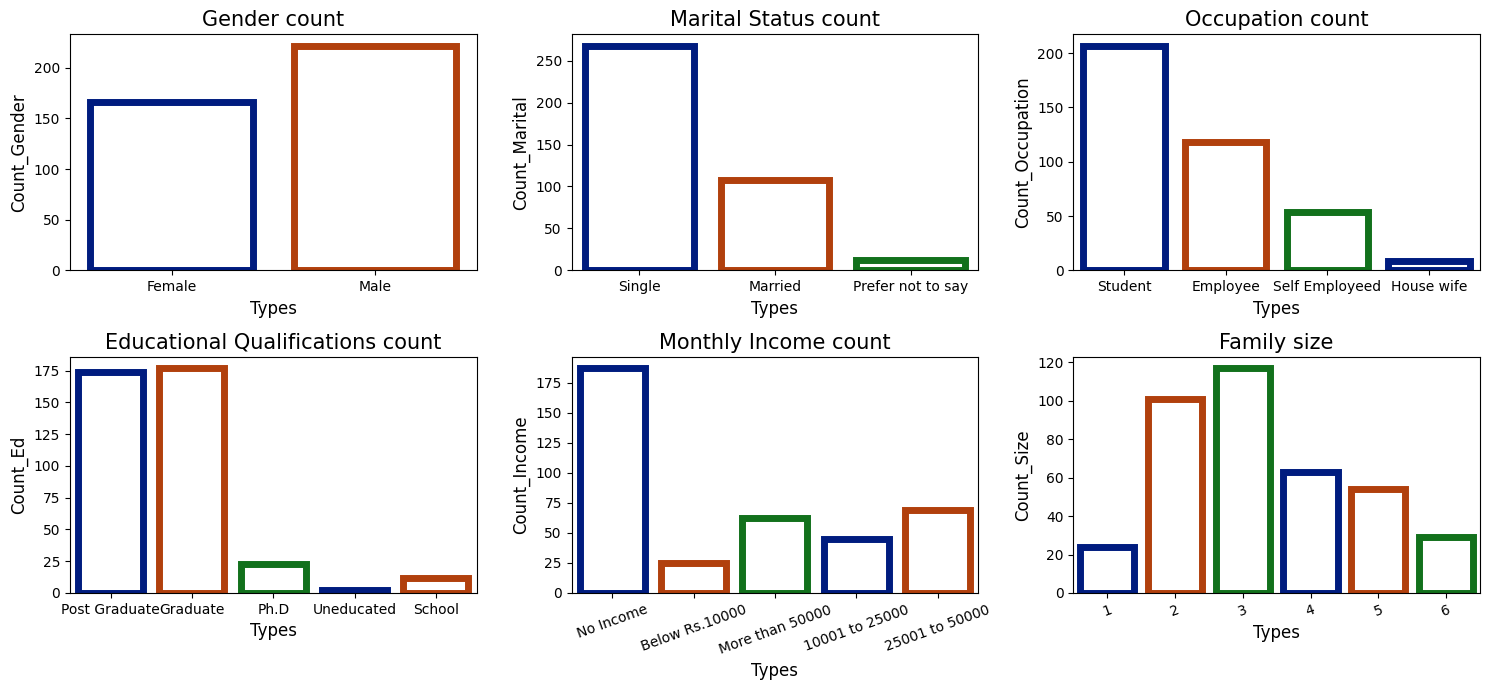

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the frame
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
plt.style.use('default')  # Using the default style

# Gender Countplot
sns.countplot(x="Gender", data=delivery,
              facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("dark", 3),
              ax=axes[0, 0])
axes[0, 0].set_title('Gender count', fontsize=15)
axes[0, 0].set_xlabel('Types', fontsize=12)
axes[0, 0].set_ylabel('Count_Gender', fontsize=12)

# Marital Status Countplot
sns.countplot(x="Marital Status", data=delivery,
              facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("dark", 3),
              ax=axes[0, 1])
axes[0, 1].set_title('Marital Status count', fontsize=15)
axes[0, 1].set_xlabel('Types', fontsize=12)
axes[0, 1].set_ylabel('Count_Marital', fontsize=12)

# Occupation Countplot
sns.countplot(x="Occupation", data=delivery,
              facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("dark", 3),
              ax=axes[0, 2])
axes[0, 2].set_title('Occupation count', fontsize=15)
axes[0, 2].set_xlabel('Types', fontsize=12)
axes[0, 2].set_ylabel('Count_Occupation', fontsize=12)

# Education Countplot
sns.countplot(x="Educational Qualifications", data=delivery,
              facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("dark", 3),
              ax=axes[1, 0])
axes[1, 0].set_title('Educational Qualifications count', fontsize=15)
axes[1, 0].set_xlabel('Types', fontsize=12)
axes[1, 0].set_ylabel('Count_Ed', fontsize=12)

# Income Countplot
sns.countplot(x="Monthly Income", data=delivery,
              facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("dark", 3),
              ax=axes[1, 1])
axes[1, 1].set_title('Monthly Income count', fontsize=15)
axes[1, 1].set_xlabel('Types', fontsize=12)
axes[1, 1].set_ylabel('Count_Income', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=20)

# Family Size Countplot
sns.countplot(x="Family size", data=delivery,
              facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("dark", 3),
              ax=axes[1, 2])
axes[1, 2].set_title('Family size', fontsize=15)
axes[1, 2].set_xlabel('Types', fontsize=12)
axes[1, 2].set_ylabel('Count_Size', fontsize=12)
axes[1, 2].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


**Insights:**
* A normal distribution exists for family distribution, with the majority of family size (number of individuals residing with you) recorded being three, followed by two. We may assume that the majority of these respondents are bachelors residing in a hostel or PG, and that they are less inclined to cook food in their room.
* It can also be noted that roughly 57% of the respondents were male and 43% were female, indicating that the data is virtually equal here.
* Respondents with the highest education qualifications were young graduates (177), followed by postgraduates (174), and it also includes Ph.D. Scholars, schoolchildren, and uneducated folks.
* The majority of responders fall into the No income category, which supports the age variable as most of them are students and they don’t have regular income.
*  The next largest earning category is between Rs 25001 and 50000, which is a starting pay in the corporate field for a rookie.
* In terms of profession, the data shows that student respondents outnumber employee respondents, which confirms the preceding findings.
* The data also includes self-employed and stay-at-home respondents.
* The majority of respondents are bachelors who are students, with a slightly smaller percentage of married respondents.

## Consumer preferences

The code sets up a frame with three subplots and creates count plots for different categorical variables:

* Meal count plot
* Medium count plot
* Preference count plot

Each subplot is customized with appropriate labels, titles, and formatting.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\486844304.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\486844304.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\486844304.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



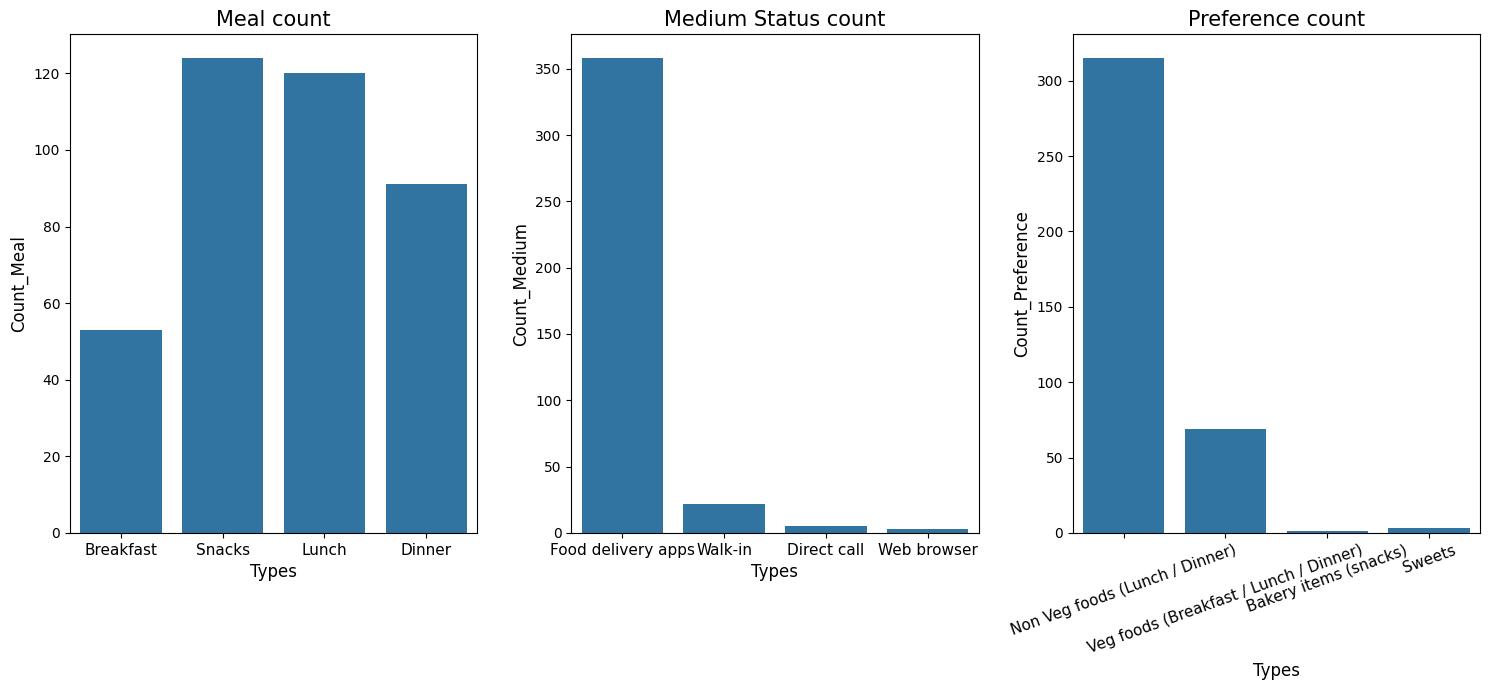

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the frame
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
plt.style.use('default')  # Using the default style

# Meal Countplot
sns.countplot(x="Meal(P1)", data=delivery, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=11)
axes[0].set_title('Meal count', fontsize=15)
axes[0].set_xlabel('Types', fontsize=12)
axes[0].set_ylabel('Count_Meal', fontsize=12)

# Medium Countplot
sns.countplot(x="Medium (P1)", data=delivery, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=11)
axes[1].set_title('Medium Status count', fontsize=15)
axes[1].set_xlabel('Types', fontsize=12)
axes[1].set_ylabel('Count_Medium', fontsize=12)

# Preference Countplot
sns.countplot(x="Perference(P1)", data=delivery, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=11, rotation=20)
axes[2].set_title('Preference count', fontsize=15)
axes[2].set_xlabel('Types', fontsize=12)
axes[2].set_ylabel('Count_Preference', fontsize=12)

plt.tight_layout()
plt.show()


**Insights:**

Data about customer preferences on which meal of the day, kind of meal, and medium to purchase food are available. When it comes to medium of purchase, the majority of people choose food delivery apps, followed by walking and just a few numbers for direct call and online browser, and most people like ordering food for lunch and snack items, followed by supper, and the least enjoy ordering morning. Nonvegetarian meals are the most popular, followed by vegetarian meals and the least amount of desserts and bakery products.


## Purchase Demand

The code sets up a frame with multiple subplots and creates count plots for different categorical variables related to customer preferences and experiences in the food delivery service. Each subplot is customized with appropriate labels, titles, and formatting.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3151105514.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3151105514.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3151105514.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3151105514.py:35: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3151105514.py:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\A

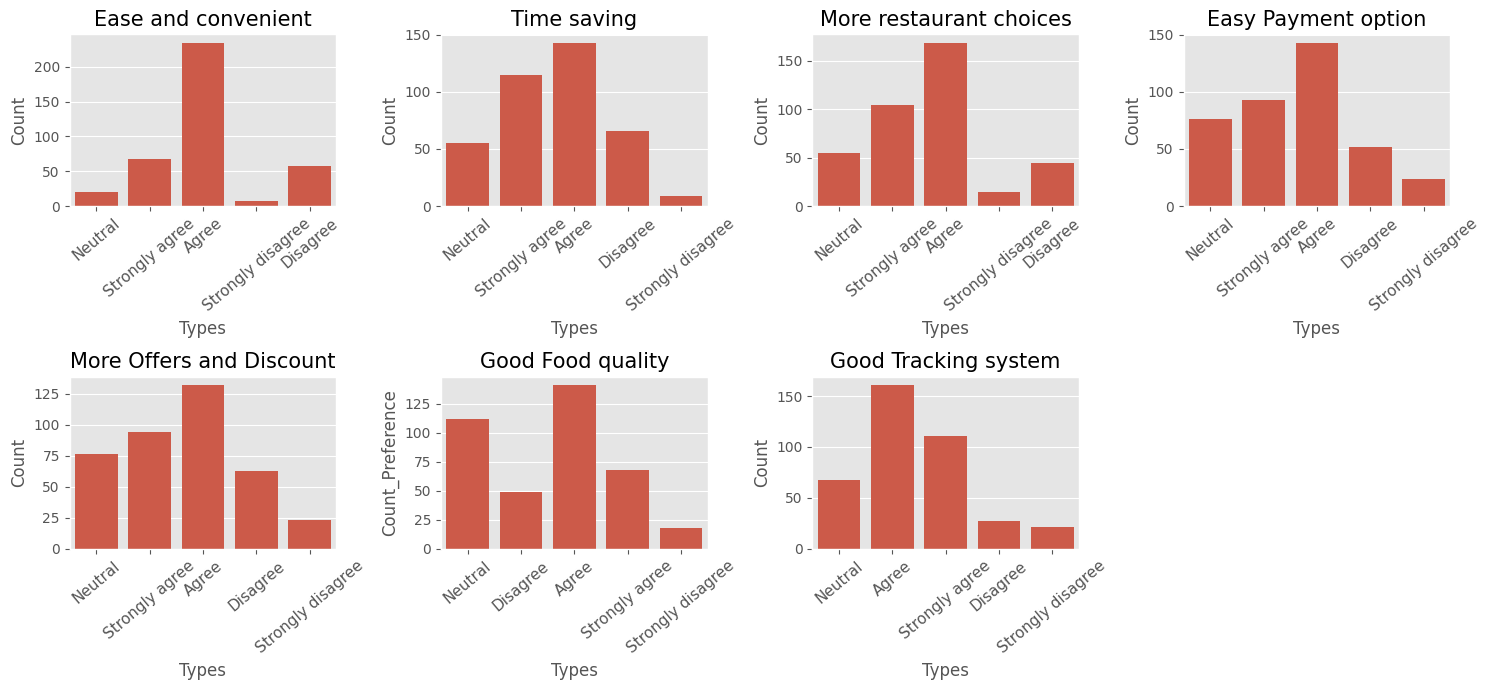

In [24]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')

#Ease and convenient Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Ease and convenient", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Ease and convenient',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Time Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Time saving", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Time saving',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Restaurant Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="More restaurant choices", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('More restaurant choices',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Payment Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Easy Payment option", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Easy Payment option',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Offers Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="More Offers and Discount", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('More Offers and Discount',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Preference Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Good Food quality", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Food quality',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

#Tracking Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Good Tracking system", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Tracking system',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

**Insights:**

It is possible to discover demand elements that entice the user to acquire an order from the application. We can see that the ease and convenience of utilizing an app for ordering are important factors in convincing people to place an order. Furthermore, the time saving component has received the greatest attention, with approximately 258 respondents agreeing that utilizing an application to order saves time. Respondents confirm that they order as a result of the restaurant options supplied by the application. Easy Payment also provides a considerable impact, with 143 respondents agreeing that this element influences order demand.The majority of respondents think that the quantity of food they receive influences their order, while almost 112 people are neutral in this regard.

## Restriction in order demand

The code sets up a frame with multiple subplots and creates count plots for different categorical variables related to customer preferences and experiences in the food delivery service. Each subplot is customized with appropriate labels, titles, and formatting, using a dark seaborn style.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1219272668.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1219272668.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1219272668.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1219272668.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1219272668.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\

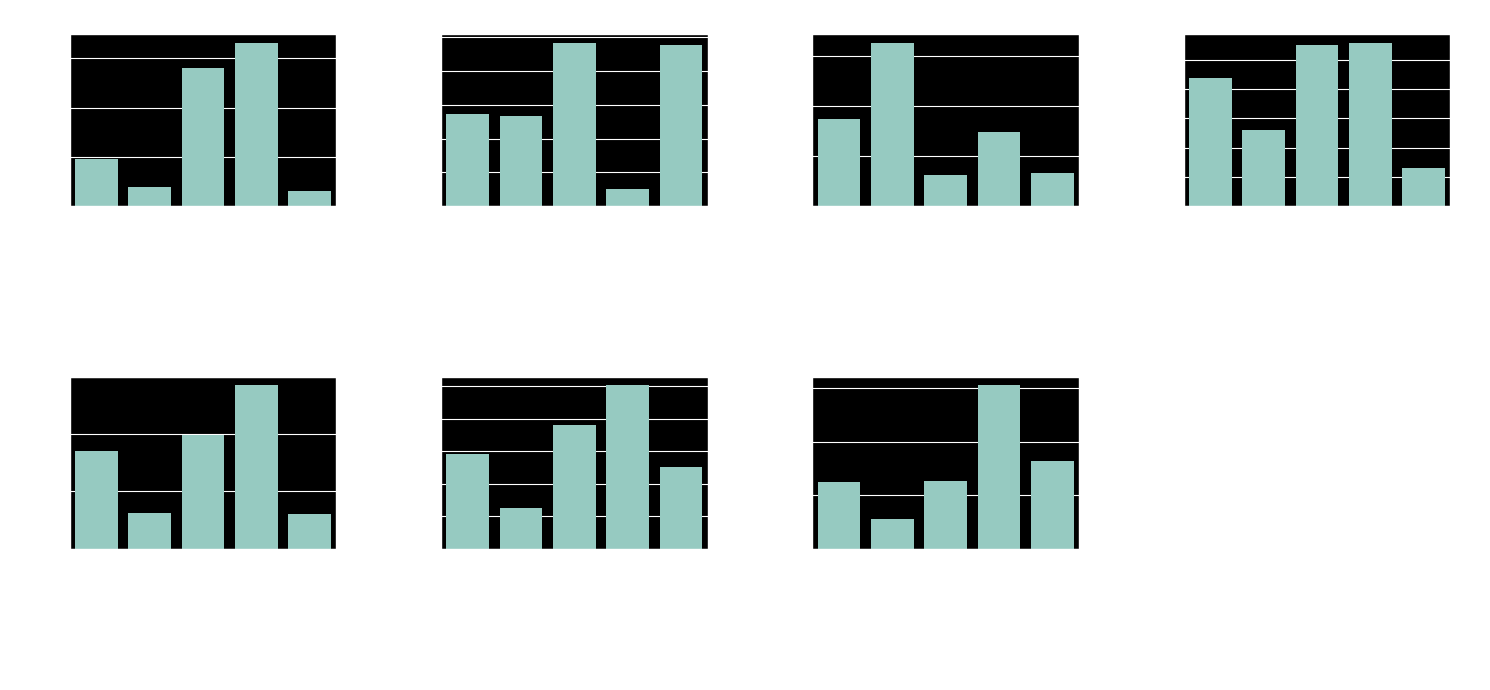

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the frame
plt.figure(figsize=(15, 7))
plt.style.use('dark_background')  # Using the 'dark_background' style

# Self cooking Countplot
plt.subplot(2, 4, 1)
ax = sns.countplot(x="Self Cooking", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40)
ax.set_title('Self Cooking', fontsize=15)
ax.set_xlabel('Types', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()

# Health Countplot
plt.subplot(2, 4, 2)
ax = sns.countplot(x="Health Concern", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40)
ax.set_title('Health Concern', fontsize=15)
ax.set_xlabel('Types', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()

# Late delivery Countplot
plt.subplot(2, 4, 3)
ax = sns.countplot(x="Late Delivery", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40)
ax.set_title('Late Delivery', fontsize=15)
ax.set_xlabel('Types', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()

# Hygiene Countplot
plt.subplot(2, 4, 4)
ax = sns.countplot(x="Poor Hygiene", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40)
ax.set_title('Poor Hygiene', fontsize=15)
ax.set_xlabel('Types', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()

# Past Countplot
plt.subplot(2, 4, 5)
ax = sns.countplot(x="Bad past experience", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40)
ax.set_title('Bad past experience', fontsize=15)
ax.set_xlabel('Types', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()

# Unavailability Countplot
plt.subplot(2, 4, 6)
ax = sns.countplot(x="Unavailability", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40)
ax.set_title('Unavailability', fontsize=15)
ax.set_xlabel('Types', fontsize=12)
ax.set_ylabel('Count_Preference', fontsize=12)
plt.tight_layout()

# Unaffordable Countplot
plt.subplot(2, 4, 7)
ax = sns.countplot(x="Unaffordable", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40)
ax.set_title('Unaffordable', fontsize=15)
ax.set_xlabel('Types', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()

plt.show()


**Insights:**

It is all of the variables that are thought to prevent customers from ordering from meal delivery apps. The majority of participants think that self-cooking causes them to avoid ordering meals through apps, but there are also 140 people who disagree. The majority agreed that one of the essential characteristics that prevents them from ordering is health, although many disputed that the food is terrible, therefore hygiene does not prevent them from ordering. The majority also disagreed that previous meal ordering experiences had little bearing on their present order desire. In addition, approximately 163 respondents acknowledged that late delivery influences their order choice. Respondents disagreed that unaffordability and scarcity prevent them from ordering.

## Influence in Cancellation of order

The code sets up a frame with multiple subplots and creates count plots for different issues related to delivery time, order accuracy, and customer mistakes in the food delivery service. Each subplot is customized with appropriate labels, titles, and formatting, using a "fivethirtyeight" style.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1539836943.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1539836943.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1539836943.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1539836943.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1539836943.py:45: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\A

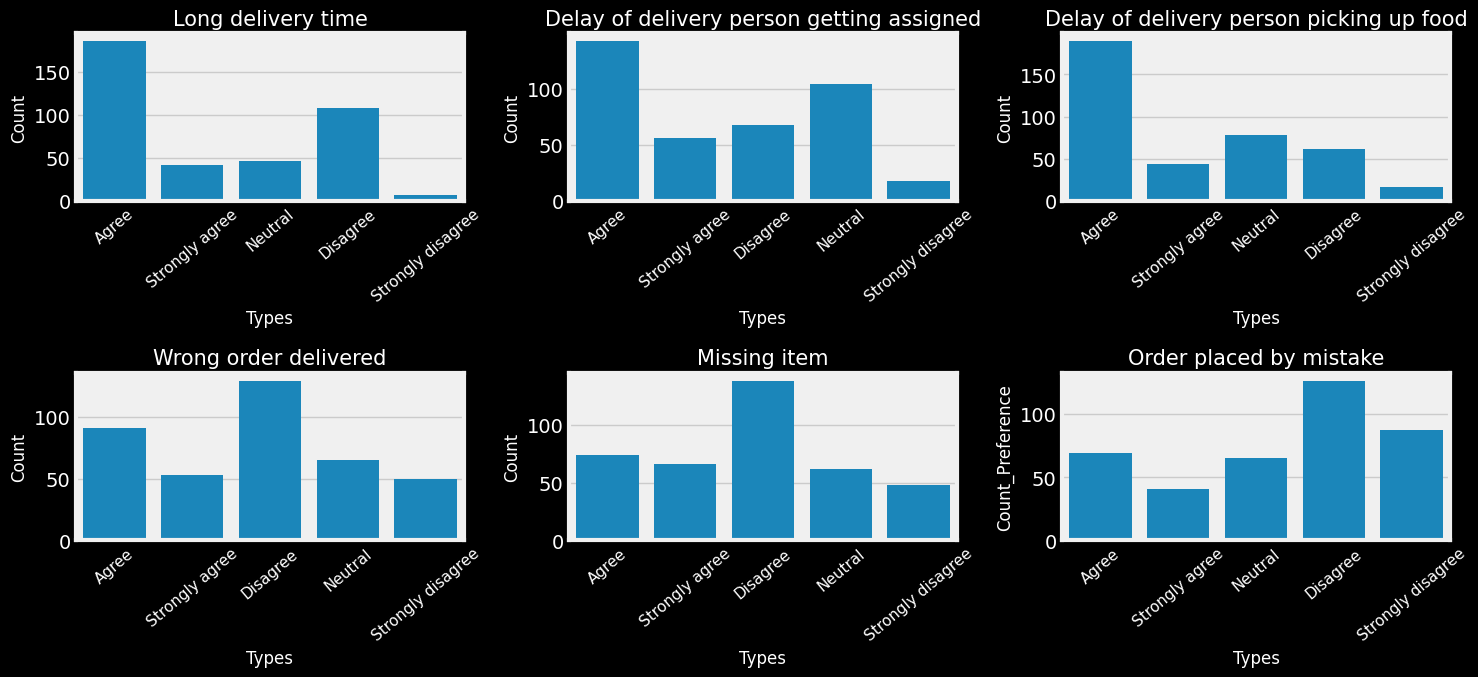

In [27]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')


#Long delivery time Countplot
plt.subplot(2,3,1)
ax = sns.countplot(x="Long delivery time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Long delivery time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delay of delivery person getting assigned Countplot
plt.subplot(2,3,2)
ax = sns.countplot(x="Delay of delivery person getting assigned", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delay of delivery person getting assigned',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delay of delivery person picking up food Countplot
plt.subplot(2,3,3)
ax = sns.countplot(x="Delay of delivery person picking up food", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delay of delivery person picking up food',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Wrong order delivered Countplot
plt.subplot(2,3,4)
ax = sns.countplot(x="Wrong order delivered", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Wrong order delivered',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Missing item Countplot
plt.subplot(2,3,5)
ax = sns.countplot(x="Missing item", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Missing item',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Order placed by mistake Countplot
plt.subplot(2,3,6)
ax = sns.countplot(x="Order placed by mistake", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Order placed by mistake',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()


**Insights:**

People believe that the delayed delivery time is strongly persuading them to cancel their current transaction. Furthermore, they agree that the delay in the delivery person being assigned to them and the delay in the delivery person picking up the meal contributed to their decision to cancel the order. However, the majority of respondents do not cancel their purchase if an item is missing or incorrectly delivered since they will find out about the problem once the order is delivered and they would be unable to cancel at that time.


## Time factors in order demand

The code sets up a frame with multiple subplots and creates count plots for various factors related to delivery time, location, accuracy, and personnel skills in the food delivery service. Each subplot is customized with appropriate labels, titles, and formatting, using a "bmh" style.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1804196332.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1804196332.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1804196332.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1804196332.py:35: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1804196332.py:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\A

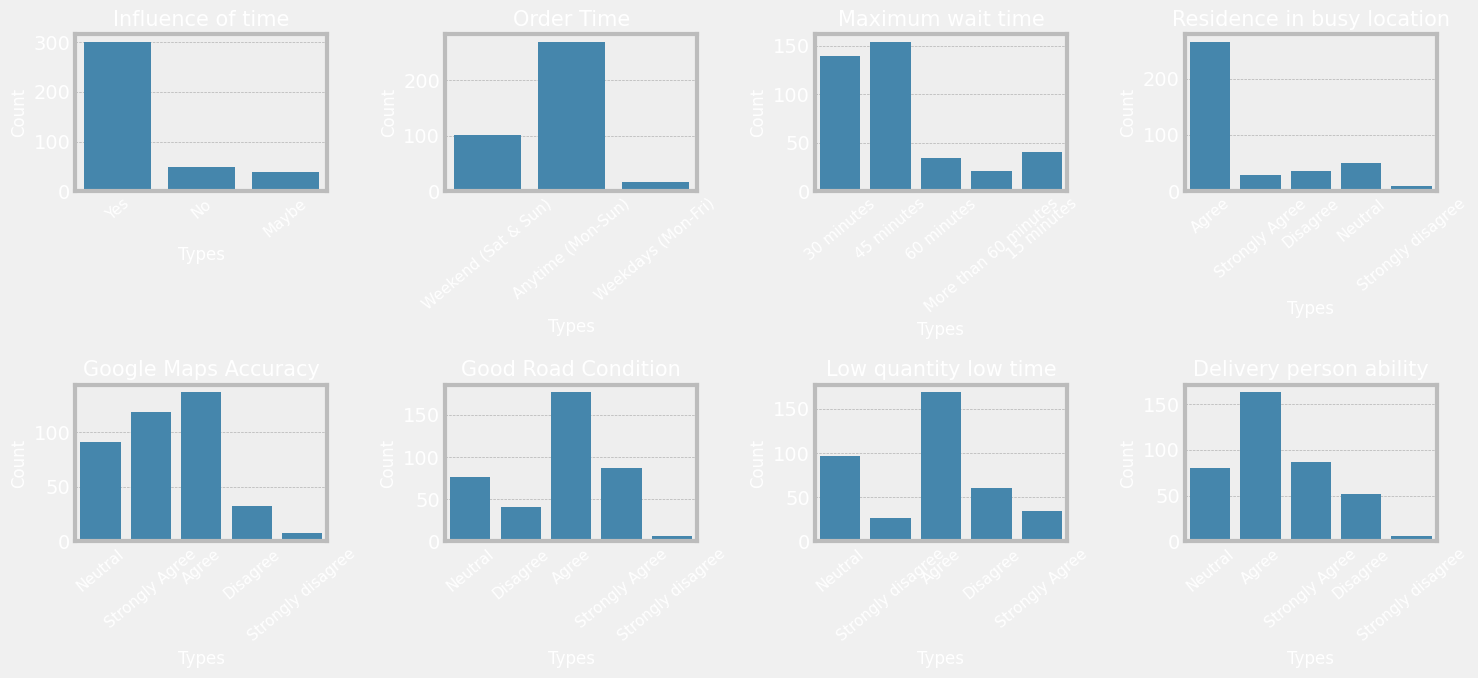

In [28]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('bmh')

#Influence of time Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Influence of time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Influence of time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Order Time Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Order Time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Order Time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Maximum wait time Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="Maximum wait time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Maximum wait time',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Hygiene Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Residence in busy location", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Residence in busy location',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Accuracy Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="Google Maps Accuracy", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Google Maps Accuracy',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Road Condition Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Good Road Condition", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Road Condition',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Low quantity low time Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Low quantity low time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Low quantity low time',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delivery person ability Countplot
plt.subplot(2,4,8)
ax = sns.countplot(x="Delivery person ability", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delivery person ability',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

**Insights:**

The majority of respondents agree that their order has an impact on the overall length of the procedure. Nearly 269 people said they order anytime during the week, with weekends and weekdays coming in second and third. Furthermore, the majority of respondents indicated that the greatest wait time to get their order is 45 minutes, followed by 30 and 60 minutes.The majority of participants agreed that they live in a busy area, and many strongly agreed that their Google Maps location is true. Almost 169 individuals believe that ordering in little quantities results in speedier delivery since the cooking time is reduced. Many Bangalore inhabitants now believe that they are living in a place.

## Importance of rating post delivery

The code sets up a frame with multiple subplots and creates count plots for various factors related to customer ratings and preferences in the food delivery service. Each subplot is customized with appropriate labels, titles, and formatting, using a "bmh" style.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1479130658.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1479130658.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1479130658.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1479130658.py:35: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1479130658.py:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\A

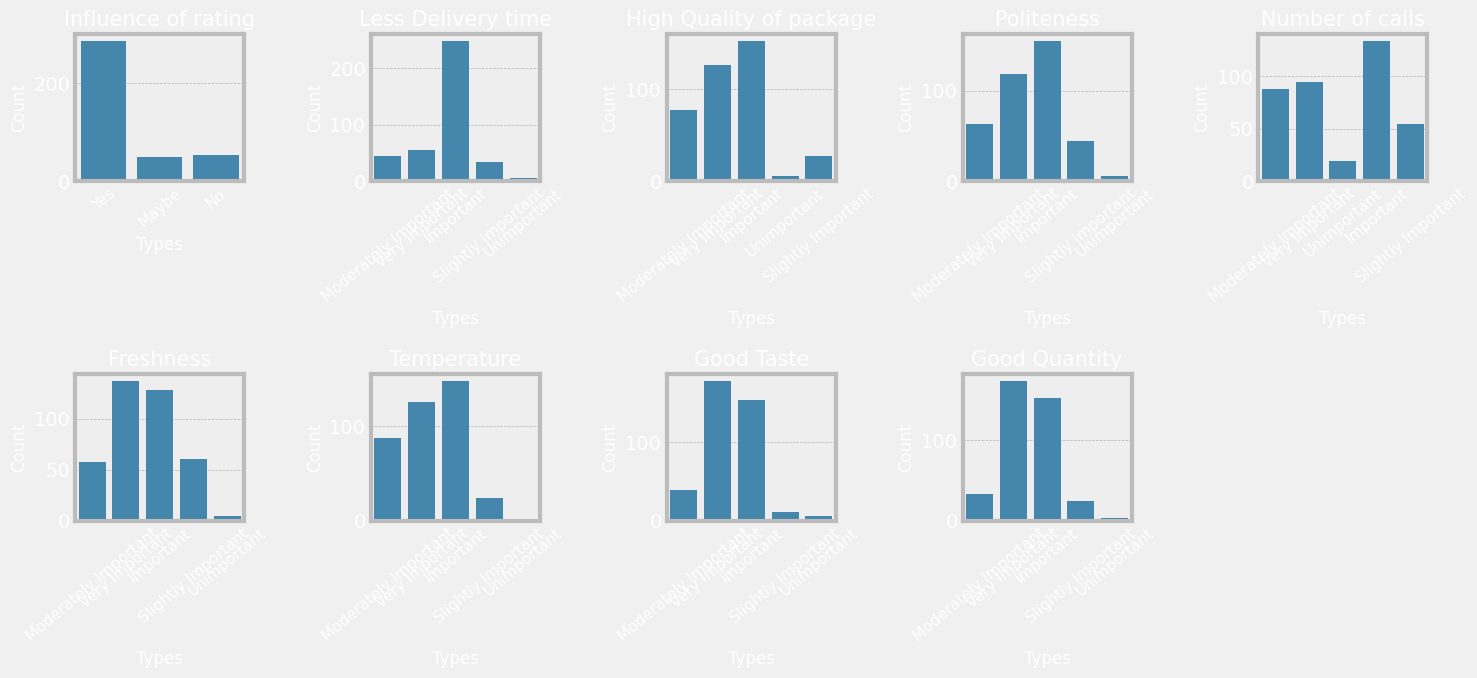

In [29]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('bmh')

#Influence of rating Countplot
plt.subplot(2,5,1)
ax = sns.countplot(x="Influence of rating", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Influence of rating',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Less Delivery time Countplot
plt.subplot(2,5,2)
ax = sns.countplot(x="Less Delivery time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Less Delivery time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#High Quality of package Countplot
plt.subplot(2,5,3)
ax = sns.countplot(x="High Quality of package", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('High Quality of package',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Politeness Countplot
plt.subplot(2,5,4)
ax = sns.countplot(x="Politeness", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Politeness',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Number of calls Countplot
plt.subplot(2,5,5)
ax = sns.countplot(x="Number of calls", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Number of calls',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Freshness Countplot
plt.subplot(2,5,6)
ax = sns.countplot(x="Freshness ", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Freshness',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Temperature Countplot
plt.subplot(2,5,7)
ax = sns.countplot(x="Temperature", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Temperature',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Taste Contplot
plt.subplot(2,5,8)
ax = sns.countplot(x="Good Taste ", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Taste',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Quantity Countplot
plt.subplot(2,5,9)
ax = sns.countplot(x="Good Quantity", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Quantity',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

**Insights:**

Nearly 286 respondents responded 'Yes' that the majority of consumers believe package quality to be significant for delivery ranking. A shorter delivery time is also considered a crucial feature when grading. When it comes to the delivery person, the majority of respondents believe the number of calls made and courtesy to be key factors. If there is a difficulty, the delivery person will usually make more calls and be less pleasant if they believe the delivery procedure is tough, which will reflect in their rating.The majority of them are positive and believe that all of the aspects are relevant when assessing the restaurant. Looking at each image, we can observe that the vast majority of individuals value freshness.

## Bivariate Analysis

## Bivariate Analysis-1

The code creates a figure with three subplots arranged horizontally. The first two subplots are box plots showing the relationship between 'Influence of time' and 'Age' or 'Family size' variables. The third subplot is a count plot showing the distribution of 'Influence of time' across different 'Occupation' categories. The overall title of the figure is set as 'Bivariate Analysis-1'.






<Axes: xlabel='Occupation', ylabel='count'>

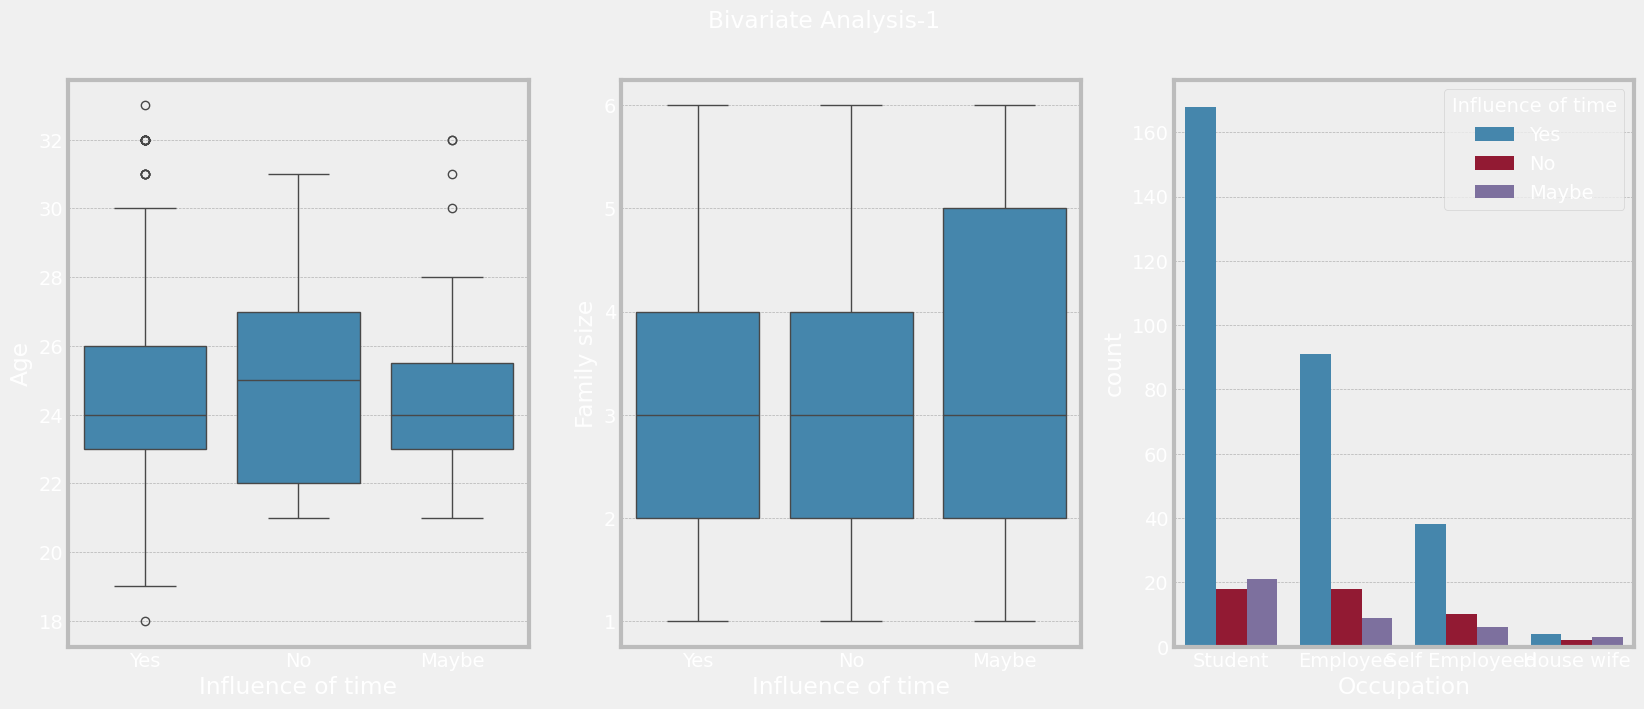

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))


fig.suptitle('Bivariate Analysis-1')

sns.boxplot(ax=axes[0], data=delivery, x='Influence of time', y='Age')
sns.boxplot(ax=axes[1], data=delivery, x='Influence of time', y='Family size')
sns.countplot(ax=axes[2],data=delivery,x="Occupation", hue="Influence of time")

**Insights:**

It may be stated that the majority of the age group is impacted by the moment of birth. However, there are a few persons in the sample who are mid-aged and are not easily swayed. They are between the ages of 22 and 28.It may also be stated that the majority of family sizes are impacted by the timing of delivery. We can see that when family size increases, there is greater effect on the time since there may be elderly members in the household. When the family size is 2,3, there is a probability that time will not be a concern.When it comes to online delivery, we can observe that time has a huge effect on students and employees. Furthermore, homemakers have lower numbers

## Bivariate Analysis-2
1. Marital status and wait time
2. Income and Influence in rating
3. Road condition and Long time in delivery

The code creates a figure with three subplots arranged horizontally. The first subplot is a count plot showing the distribution of 'Maximum wait time' across different 'Marital Status' categories. The second subplot is a count plot showing the distribution of 'Influence of rating' across different 'Monthly Income' categories, with rotated x-axis labels. The third subplot is a count plot showing the distribution of 'Long delivery time' across different 'Good Road Condition' categories, also with rotated x-axis labels. The overall title of the figure is set as 'Bivariate Analysis-2'.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1484325909.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1484325909.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'Neutral'),
 Text(1, 0, 'Disagree'),
 Text(2, 0, 'Agree'),
 Text(3, 0, 'Strongly Agree'),
 Text(4, 0, 'Strongly disagree')]

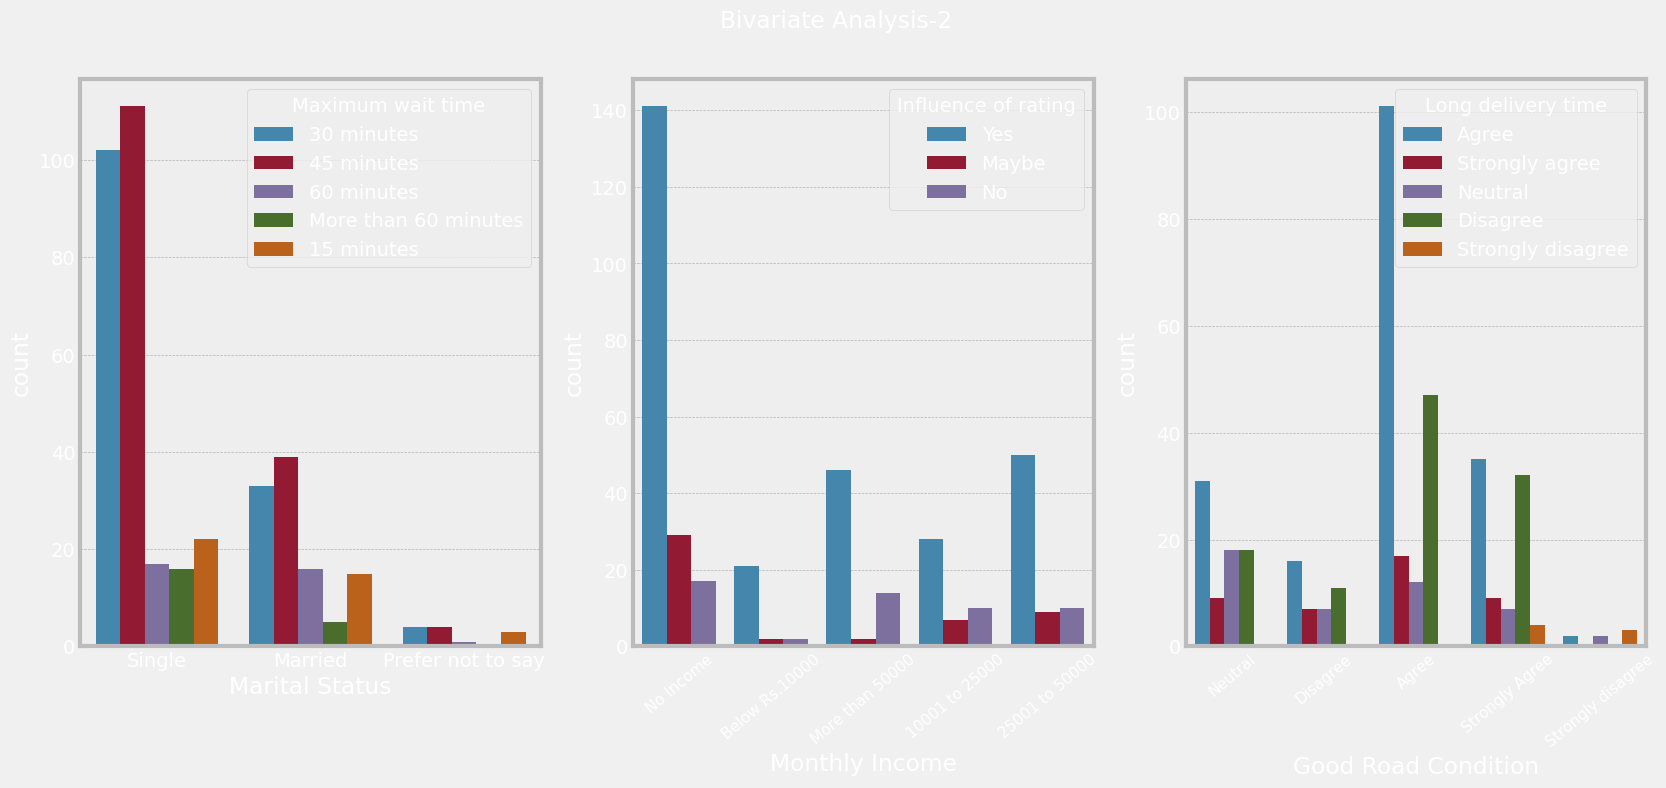

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))


fig.suptitle('Bivariate Analysis-2')

sns.countplot(ax=axes[0],data=delivery,x="Marital Status", hue="Maximum wait time")
ax=sns.countplot(ax=axes[1],data=delivery,x="Monthly Income", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[2],data=delivery,x="Good Road Condition", hue="Long delivery time")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)

**Insights:**

In terms of the waiting room, there is no discernible difference between the groups. The majority of married and bachelor respondents claimed their waiting time is between 30-45 minutes, with the exception of more students who can wait more than 60 minutes when compared to married respondents.Respondents with no income are more likely in the student group, which has a greater effect than the other income categories. Following the No income group, the 25001-50000 income level respondents had the most rating effect.Poor road conditions might often cause gridlock, resulting in a lengthy delivery time.

## Bivariate Analysis-3
1. Order time and Late delivery
2. Busy location and Long time in delivery
3. Food quality and influence in rating

The code creates a figure with three subplots arranged horizontally. Each subplot is a count plot showing the distribution of a particular variable across different categories, with the count represented by the height of the bars. The subplots include 'Late Delivery' vs 'Order Time', 'Long delivery time' vs 'Residence in busy location', and 'Influence of rating' vs 'Good Food quality'. The x-axis labels in each subplot are rotated for better visibility. The overall title of the figure is set as 'Bivariate Analysis-3'. The style of the plots is set to "white" using the sns.set_style() function.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3833291137.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3833291137.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3833291137.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'Neutral'),
 Text(1, 0, 'Disagree'),
 Text(2, 0, 'Agree'),
 Text(3, 0, 'Strongly agree'),
 Text(4, 0, 'Strongly disagree')]

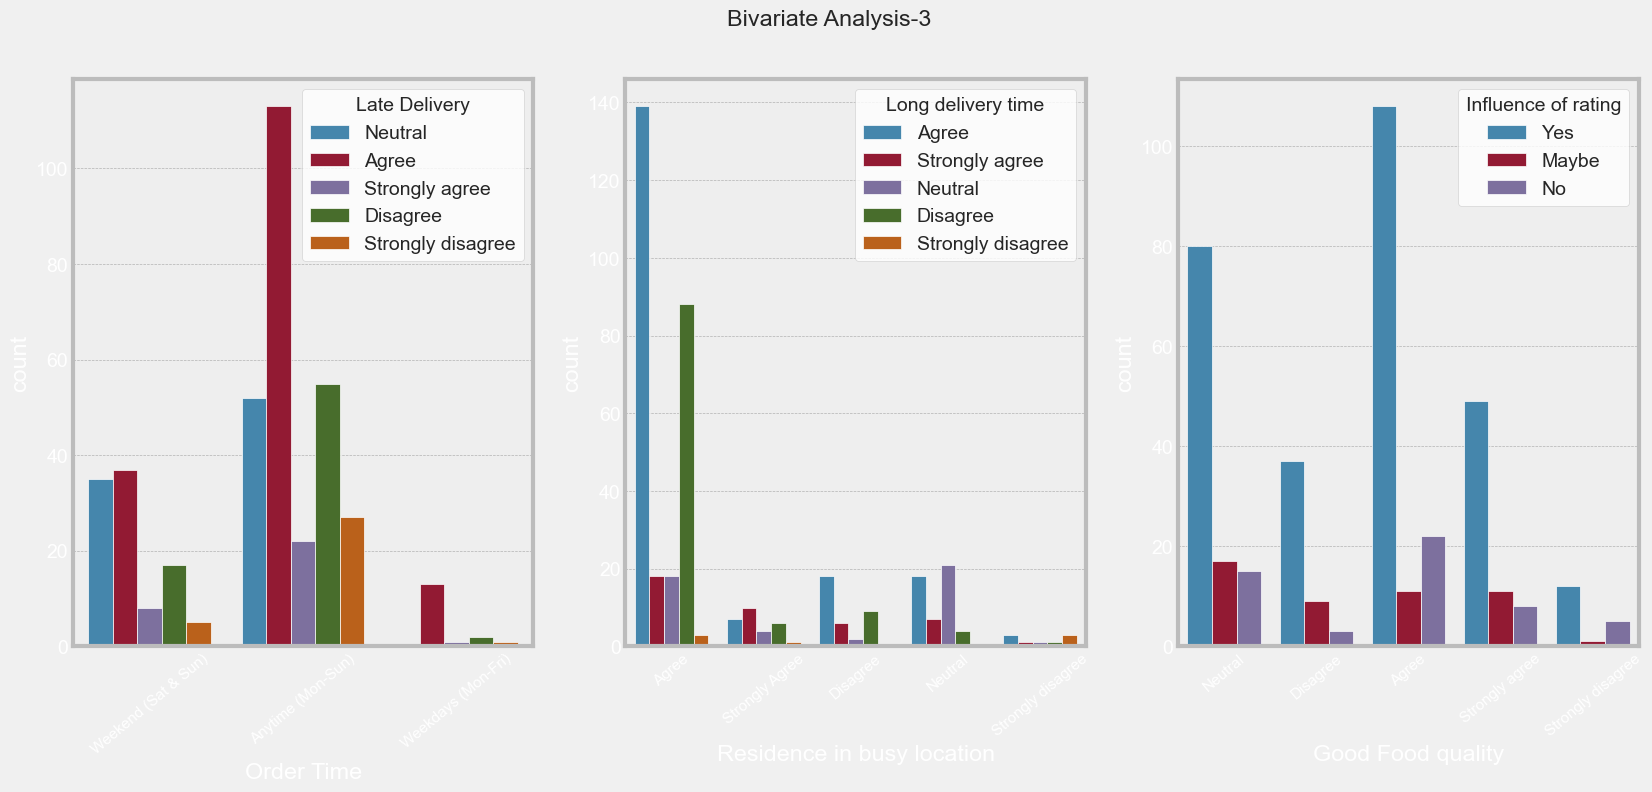

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
sns.set_style("white")

fig.suptitle('Bivariate Analysis-3')

ax=sns.countplot(ax=axes[0],data=delivery,x="Order Time", hue="Late Delivery")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[1],data=delivery,x="Residence in busy location", hue="Long delivery time")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[2],data=delivery,x="Good Food quality", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)

**Insights:**

It can be seen that the orders placed on weekend have much majority votes on late delivery when compared to the orders in weekdays. There are very less people who disagree that there isn’t late delivery on weekends.The busier location is, late the delivery can be as from the results plotted by this data. Nearly 157 respondents have agreed that they are from residence in busy location and they are experiencing delay in delivery.Also it can be said from the plot 3 that quality does impact to a certain level as nearly 108 respondents have agreed that the quality of food have influence in their rating followed by 80 respondents who voted neutral for this hypothesis.

## Bivariate Analysis-4
1. Quantity and Influence in rating
2. Food temperature and Influence in rating
3. Taste and Influence in rating

The code creates a figure with three subplots arranged horizontally. Each subplot is a count plot showing the distribution of a particular variable across different categories, with the count represented by the height of the bars. The subplots include 'Influence of rating' vs 'Good Quantity', 'Influence of rating' vs 'Temperature', and 'Influence of rating' vs 'Good Taste'. The x-axis labels in each subplot are rotated for better visibility. The overall title of the figure is set as 'Bivariate Analysis-4'. The style of the plots is set to "dark" using the sns.set_style() function.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\2605462434.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\2605462434.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\2605462434.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



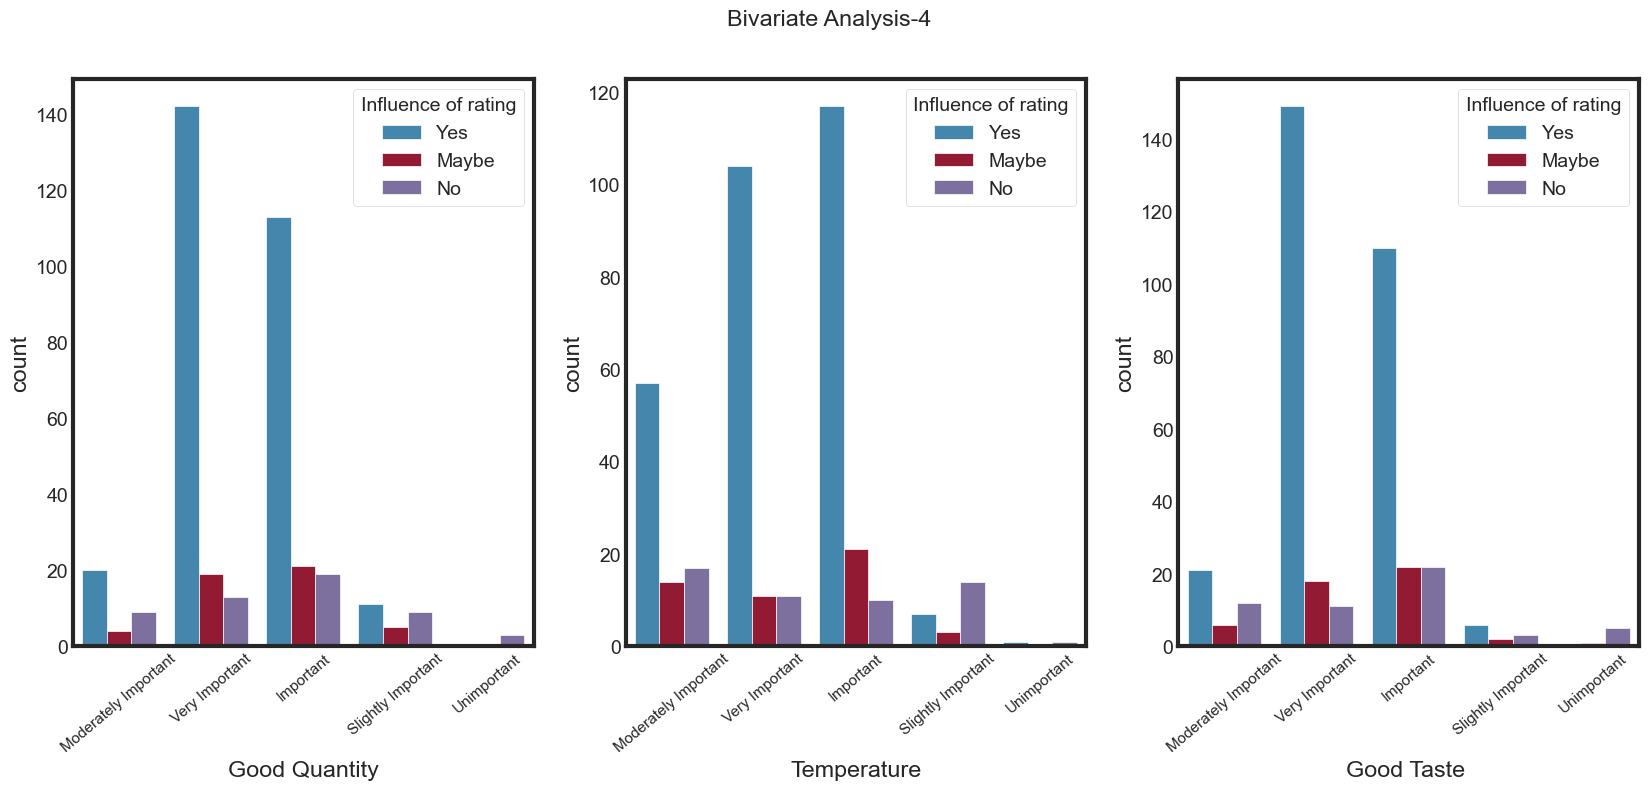

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))


fig.suptitle('Bivariate Analysis-4')

ax=sns.countplot(ax=axes[0],data=delivery,x="Good Quantity", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[1],data=delivery,x="Temperature", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax=sns.countplot(ax=axes[2],data=delivery,x="Good Taste ", hue="Influence of rating")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)

sns.set_style("dark")

**Insights:**

It can be said from the plot that quantity highly impacts rating as nearly 142 respondents finds it very important followed by 113 respondents who voted important for the food quantity when considering to rate the restaurant.From the plot 2 the temperature is considered important as nearly 117 respondents have voted important followed by 104 respondents who voted very important for the food temperature when considering to rate the restaurant.From the plot 3 taste is considered very important as nearly 149 respondents have voted very important followed by 100 respondents who voted just important for the food taste when considering to rate the restaurant.

## Multivariate Analysis

## Multivariate Analysis-1

The code creates a bar plot using the Plotly library, where the x-axis represents the "Influence of time" variable, the y-axis represents the "Good Road Condition" variable, and the bars are colored based on the "Good Road Condition" variable. The plot is grouped based on the "Order Time" variable, creating separate bars for each category of "Order Time". The title of the plot is set to "Does Road condition and Order time has anything to do with influence in time?" and the background color is set to "LightSteelBlue". The plot is displayed using the fig.show() function.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\747537365.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




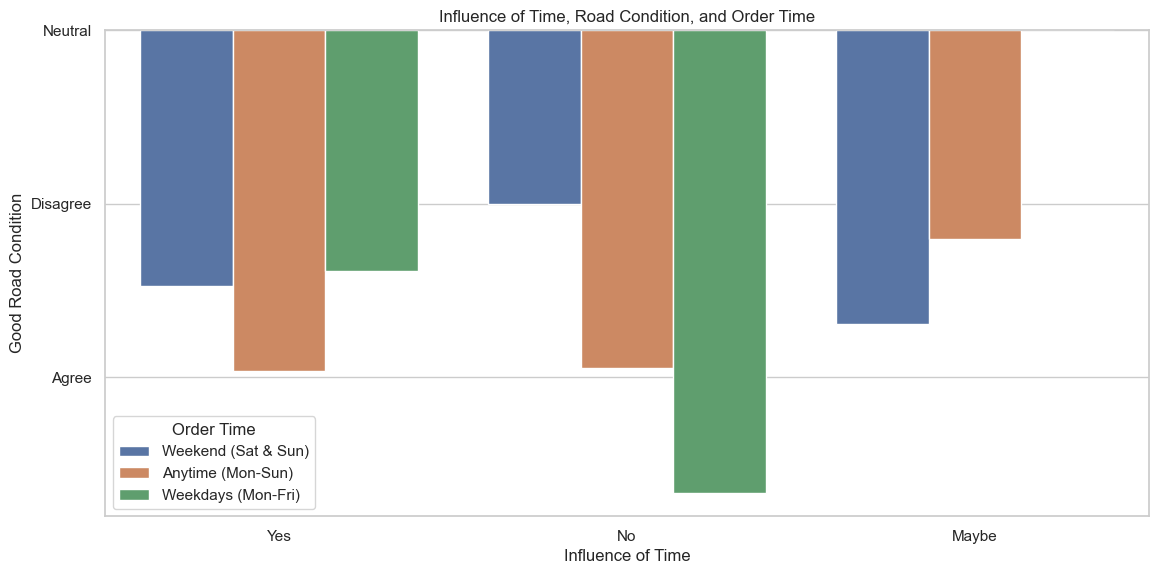

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot with three variables
sns.barplot(x="Influence of time", y="Good Road Condition", hue="Order Time", data=delivery, ci=None)

# Set up the title and labels
plt.title('Influence of Time, Road Condition, and Order Time')
plt.xlabel('Influence of Time')
plt.ylabel('Good Road Condition')

# Show the plot
plt.show()


**Insights:**

It can be seen that there is a high influence of time when the road conditions are good and especially during the weekends. There are nearly 45 respondents have agreed that they consider time as an important factor during delivery during weekends with a good road condition.

## Multivariate Analysis-2

The code creates a bar plot using the Plotly library, where the x-axis represents the "Influence of time" variable, the y-axis represents the "Number of calls" variable, and the bars are colored based on the "Number of calls" variable. The plot is grouped based on the "Late Delivery" variable, creating separate bars for each category of "Late Delivery". The title of the plot is set to "Does Number of calls and Late delivery has anything to do with influence in time?" and the background color is set to "LightSteelBlue". The plot is displayed using the fig.show() function.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\1338956996.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




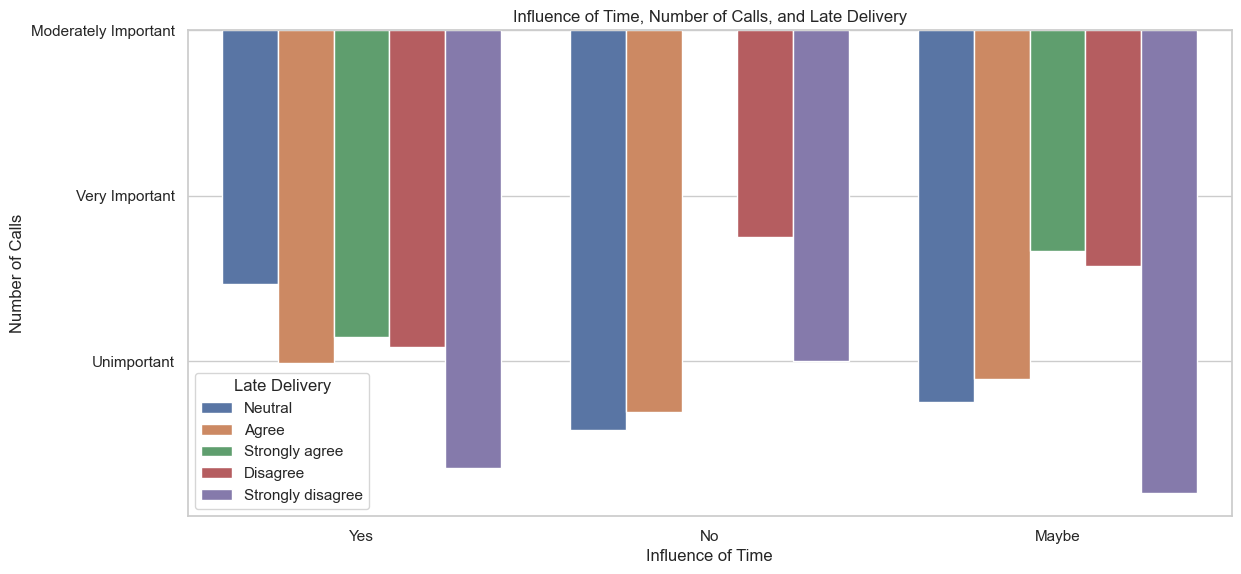

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot with three variables
sns.barplot(x="Influence of time", y="Number of calls", hue="Late Delivery", data=delivery, ci=None)

# Set up the title and labels
plt.title('Influence of Time, Number of Calls, and Late Delivery')
plt.xlabel('Influence of Time')
plt.ylabel('Number of Calls')

# Show the plot
plt.show()


**Insights:**

It can be seen that there is a lot of influence in time when the people consider number of calls as an important factor and there is a late delivery. Usually delivery person calls the customer to pass on any information and or when the person couldn’t reach the destination which consumes time and the delivery gets delayed.

## Multivariate Analysis -3

The code creates a bar plot using the Plotly library, where the x-axis represents the "Influence of rating" variable, the y-axis represents the "High Quality of package" variable, and the bars are colored based on the "High Quality of package" variable. The plot is grouped based on the "Poor Hygiene" variable, creating separate bars for each category of "Poor Hygiene". The title of the plot is set to "Does Packaging and Hygiene has anything to do with influence in rating?" and the background color is set to "LightSteelBlue". The plot is displayed using the fig.show() function.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\4098548110.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




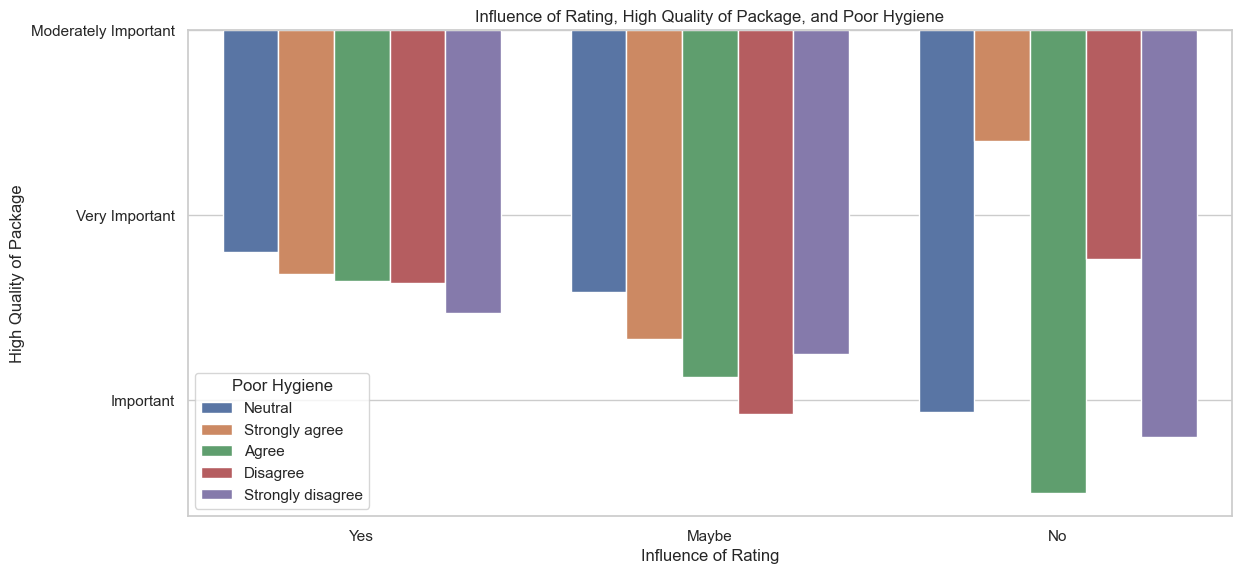

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot with three variables
sns.barplot(x="Influence of rating", y="High Quality of package", hue="Poor Hygiene", data=delivery, ci=None)

# Set up the title and labels
plt.title('Influence of Rating, High Quality of Package, and Poor Hygiene')
plt.xlabel('Influence of Rating')
plt.ylabel('High Quality of Package')

# Show the plot
plt.show()


**Insights:**

From the plot, it can be said that Quality of package is very important and hygiene also plays an important role as nearly 80+ respondents has agreed that hygiene plays an important role and in that nearly 69 respondents support quality of package influences the rating of restaurants.

## Multivariate Analysis-4

The code creates a bar plot using the Plotly library, where the x-axis represents the "Influence of rating" variable, the y-axis represents the "Good Taste" variable, and the bars are colored based on the "Good Taste" variable. The plot is grouped based on the "Temperature" variable, creating separate bars for each category of "Temperature". The title of the plot is set to "Does Taste and Temperature of food has anything to do with influence in rating?" and the background color is set to "LightSteelBlue". The plot is displayed using the fig.show() function.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\66670004.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




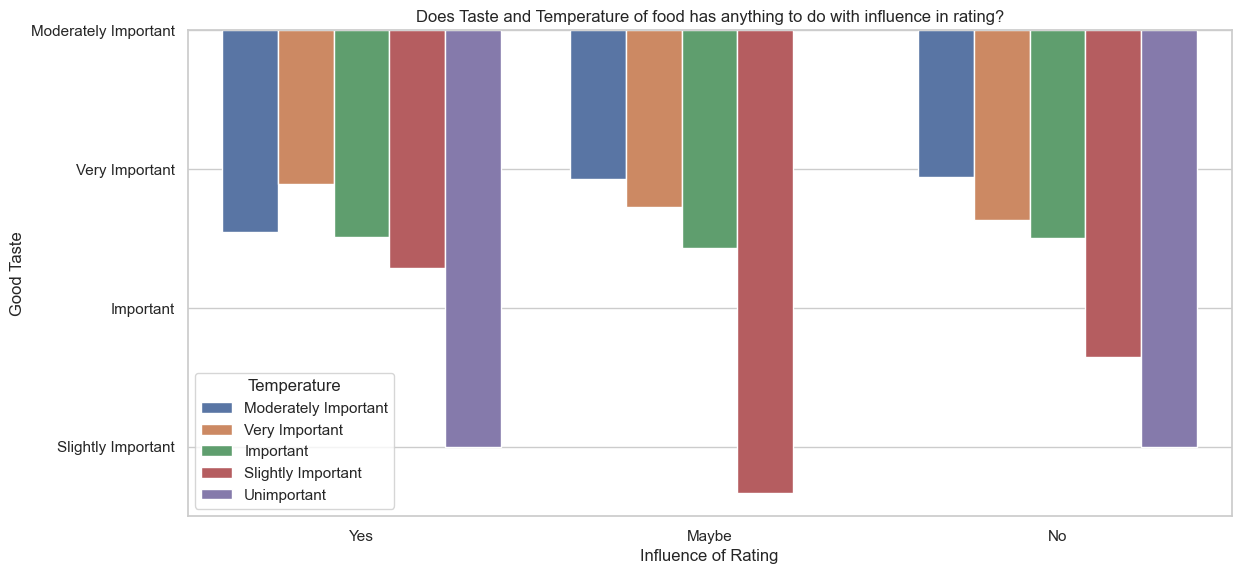

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot with three variables
sns.barplot(x="Influence of rating", y="Good Taste ", hue="Temperature", data=delivery, ci=None)

# Set up the title and labels
ax.set_title('Does Taste and Temperature of food has anything to do with influence in rating?')
ax.set_xlabel('Influence of Rating')
ax.set_ylabel('Good Taste')

# Show the plot
plt.show()


**Insights:**

From the results, it can be identified that people consider both important as nearly 93 respondents voted very important for rating a restaurant followed by many respondents voting it as an important. There are significantly a smaller number of people who has voted when they have no influence of rating.

## Multivariate Analysis-5

The code creates a bar plot using the Plotly library, where the x-axis represents the "Influence of rating" variable, the y-axis represents the "Good Quantity" variable, and the bars are colored based on the "Good Quantity" variable. The plot is grouped based on the "Freshness" variable, creating separate bars for each category of "Freshness". The title of the plot is set to "Does Quantity and Freshness of food have anything to do with influence in rating?" and the background color is set to "LightSteelBlue". The plot is displayed using the fig.show() function.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3000\3799774046.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




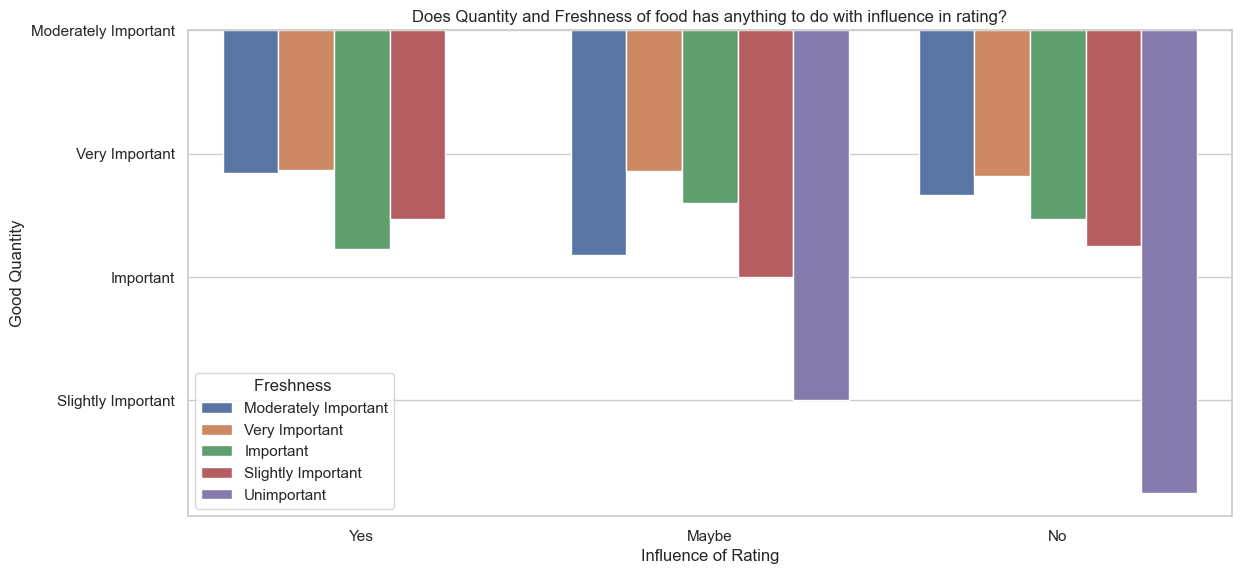

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot with three variables
sns.barplot(x="Influence of rating", y="Good Quantity", hue="Freshness ", data=delivery, ci=None)

# Set up the title and labels
ax.set_title('Does Quantity and Freshness of food has anything to do with influence in rating?')
ax.set_xlabel('Influence of Rating')
ax.set_ylabel('Good Quantity')

# Show the plot
plt.show()


**Insights:**

From the plot, it can be identified that people consider both important as nearly 87 respondents voted very important for rating a restaurant followed by many respondents voting it as an important. There are significantly a smaller number of people who has voted when they have no influence of rating.

# Geospatial Analysis

## Geo Pointers

The code filters the "delivery" dataset to create a subset called "Age_band" containing rows where the age falls between 18 and 40. Then, it creates a Folium map centered at the coordinates [12.9716, 77.5946] with "cartodbpositron" tiles and a zoom level of 13. Next, it iterates over the rows in the "Age_band" subset and adds markers to the map based on the latitude and longitude values. Finally, it displays the map with the added markers.






In [49]:
Age_band = delivery[(delivery.Age.isin(range(18,40)))]
# Creating a map
m_2 = folium.Map(location=[12.9716,77.5946], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
for idx, row in Age_band.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Displaying the map
m_2

**Insights:**

We have considered the Age band of 18-40 to get the maximum pointers for this plot. As you can see I have collected data across all the places inside the Bangalore Urban and also the outskirts of the city which makes the data more reliable for it's findings. Most of the data are concentrated much on the Bangalore Urban(inside the city)

## Clustered Location

The code creates a Folium map called "m_3" with a specified location, tiles, and zoom level. It then initializes a MarkerCluster object and iterates over the rows in the "Age_band" subset to add markers to the map, skipping rows with missing latitude or longitude values. Finally, it adds the MarkerCluster to the map and displays it with the added markers.






In [26]:
# Creating the map
m_3 = folium.Map(location=[12.9716,77.5946], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
mc = MarkerCluster()
for idx, row in Age_band.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_3.add_child(mc)

# Displaying the map
m_3

**Insights:**

Most of the data are concentrated in the heart of city- which includes places like Gandhinagar, Chikkapete,VVPuram,Rajajinagar. The next highest data cluster is recorded in South Bangalore where JP Nagar, Madiwala and Koramangala are located. I have also collected nearly 18 responses from Whitefield which is located in the outskirts of Bangalore.

# Conclusion

<img src="https://i.pinimg.com/originals/e5/07/d7/e507d704d4b6fdcb17116762fcd99acd.gif">

All the objectives have been satisfied and we have seen that time of delivery and rating of restaurant plays a major role in customer satisfaction of a food order.Growing companies in this sector like swiggy and zomato are updating their strategies and even provide hygenic food during pandemic and ensures us safety.